<a id='files_information'></a>
## Step 1. Files Information 

In [1]:
# Import Libraries
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

pd.set_option('max_colwidth', 400)

In [2]:
hypotheses = pd.read_csv('hypotheses_us.csv', sep=';')
orders = pd.read_csv('orders_us.csv')
visits = pd.read_csv('visits_us.csv')

<b>Hypotheses Dataset</b>

In [3]:
# Change the column names to small cases
empty_list = []
for col in hypotheses.columns.tolist():
    empty_list.append(col.lower())
hypotheses.columns =  empty_list

In [4]:
display(hypotheses)
display(hypotheses.info())

,hypothesis,reach,impact,confidence,effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

<b>Orders Dataset</b>

In [5]:
display(orders.head())
display(orders.info())
display(orders[orders.duplicated()])

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group


<b>Visits Datatset</b> 

In [6]:
display(visits.head())
display(visits.info())
display(visits[visits.duplicated()])
display(visits['visits'].unique())

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visits


array([719, 619, 507, 717, 756, 667, 644, 610, 617, 406, 718, 595, 748,
       735, 628, 361, 412, 668, 502, 575, 646, 609, 468, 395, 621, 722,
       711, 594, 577, 490, 699, 713, 581, 509, 770, 707, 655, 709, 654,
       369, 721, 543, 769, 746, 544, 413, 421, 737, 487, 560, 656, 650,
       546, 378, 679, 676, 720, 531])

<a id='data_preprocessing'></a>
## Step 2. Data Preprocessing 

In [7]:
orders['date'] = pd.to_datetime(orders['date'], dayfirst=True)

visits['date'] = pd.to_datetime(visits['date'], dayfirst=True)

In [8]:
# Group the orders df into their respective groups
groupA = orders[orders['group'] == 'A']
groupB = orders[orders['group'] == 'B']

display(len(orders.visitorId.unique()))

# Merge the two grouped df
merge_sample = groupA.merge(groupB, on='visitorId', how='inner')
display(len(merge_sample.visitorId.unique()))

# Filter out the 'visitorId' belonging to the two groups
new_orders = orders[~orders['visitorId'].isin(list(merge_sample['visitorId']))]
display(len(new_orders.visitorId.unique()))

1031

58

973

<b>Conclusion</b>

Here, we converted the date column to datetime format and to show the date only

Some visitorIds in orders dataframe belong to group A as well as group B and since the purpose of our project is to analyze/compare the two groups, we filtered out those that belong to those two groups as it might compromise the reliability of the result of our analysis. 

It is noteworthy to say that for the visits dataframe, this set of visitorIds that belong to two groups already have their visits aggregated with the rest of the visitors and there is little or nothing we could do to filter them out from the dataset.  

<a id='hypotheses'></a>
## Step 3. Prioritizing Hypotheses

<b>Apply the ICE framework to prioritize hypotheses.</b>

In [9]:
hypotheses['ICE'] = ((hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']).round(1)
hypotheses.sort_values(by='ICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.2
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.2
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.1
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0


<b>Apply the RICE framework to prioritize hypotheses.</b>

In [10]:
hypotheses['RICE'] = ((hypotheses['impact'] * hypotheses['confidence'] * hypotheses['reach']) / hypotheses['effort'])
hypotheses.sort_values(by='RICE', ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.2,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.3,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.2,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.1,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.3,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0,3.0


<b>Conclusion</b>

Calculating the ICE ((impact * confidence) / effort), hypothesis 8 (Launch a promotion that gives users discounts on their birthdays) has the highest score of 16.2. This is a result of a high impact and confidence score with an average score of effort of 5. The second high score (13.3) is hypothesis 0 (Add two new channels for attracting traffic).  Although the value of its impact and confidence are high, the effort required is a little higher than average. This results to the drop in the score of its ICE.

The hypothesis with the least score is hypothesis 4 (Change the background color on the main page). With low impact (1), low confidence(1), and low effort(1), the ICE did not change its score.

<b>Changes in prioritization of both framework</b>

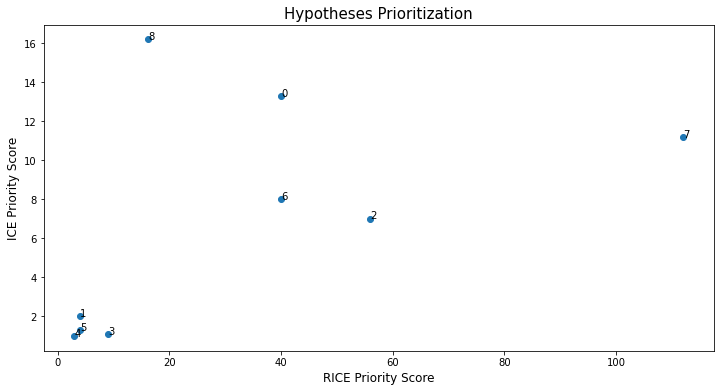

In [11]:
# Graphical representation
plt.figure(figsize=(12, 6))
plt.scatter(hypotheses['RICE'].tolist(), hypotheses['ICE'].tolist(), marker="o")
for i, txt in enumerate(hypotheses.index.tolist()):
    plt.annotate(txt, (hypotheses['RICE'].tolist()[i], hypotheses['ICE'].tolist()[i]))
plt.title('Hypotheses Prioritization', size=15)
plt.xlabel('RICE Priority Score', size=12)
plt.ylabel('ICE Priority Score', size=12)
plt.show()

<b>Conclusions</b>

Calculating the RICE ((reach * impact * confidence) / effort), hypothesis 7 (Add a subscription form to all the main pages) has the highest score of 112. This is because the reach, impact, and confidence are high with an average effort of 5. Comparing it with hypotheis 2, Hypothesis 2 (Add product recommendation blocks to the store's site) has the second high score of 56 with high reach and confidence but a really low impact of 3 and a little above average score 6 in effort.

Hypothesis 4 has the least score in RICE (3). Reach (3), impact(1), confidence(1), and effort(1)

<b>Show how the prioritization of hypotheses changes when you use RICE instead of ICE.</b>

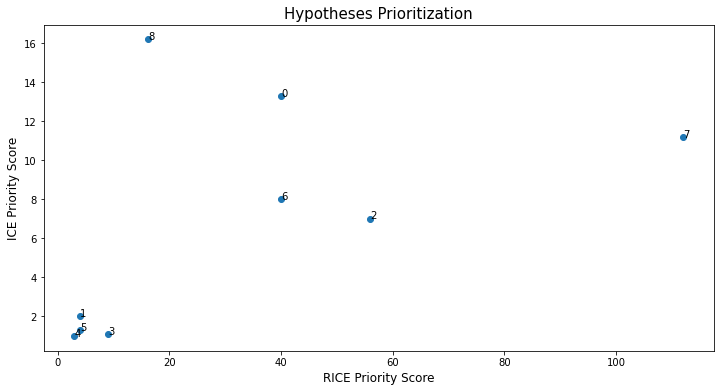

In [12]:
# Graphical representation
plt.figure(figsize=(12, 6))
plt.scatter(hypotheses['RICE'].tolist(), hypotheses['ICE'].tolist(), marker="o")
for i, txt in enumerate(hypotheses.index.tolist()):
    plt.annotate(txt, (hypotheses['RICE'].tolist()[i], hypotheses['ICE'].tolist()[i]))
plt.title('Hypotheses Prioritization', size=15)
plt.xlabel('RICE Priority Score', size=12)
plt.ylabel('ICE Priority Score', size=12)
plt.show()

<b>Conclusions</b>

Methods of calculation matters when it comes to prioritizing hypothesis. From the hypotheses data, we can see that the priority of each hypothesis is different according to the result of the ICE and RICE. 

According to ICE result, hypothesis 8 is with the highest priority but according to RICE calculation, it is at the 5th priority. This is because of its high impact, hight confidence, medium effort but a really low reach. Same goes to hypothesis 0. It ranks second in ICE calculation but 3rd in RICE calcultion. It has a high impact, hight confidence, medium effort but a low reach.

Looking at hypothesis 7 and 2 ranking first and second respectively in RICE calculation, both ranked third and fifth in ICE calculation. Hypothesis 7 has a very high reach, high impact, high confidence, and a medium effort. And hypothesis 2 has a high reach, low impact, high confidence and low effort.

Having a low effort in both framework calculation goes a long way in increasing the priority of a hypothesis. But if a hypothesis has a low effort while other factors are low too, the chances of having a high priority will be low. Take an instance, hypothesis 4. Although it has a low effort, all other factors affecting the calculation of both frameworks are low and this resulted to it being the least in the decreasing order of priority for both frameworks.

So, for a hypothesis to have a high rank in RICE or/and ICE, the reach, impact, and confidence have to be high while the effort has to be low. 

<a id='ab_testing'></a>
## Step 4. A/B Test Analysis

<a id='cum_revenue'></a>
<b>Cumulative Revenue by Group.</b>

,date,revenueA,revenueB,ordersA,ordersB,cum_revenueA,cum_revenueB,cum_ordersA,cum_ordersB
0,2019-08-01,2266.6,967.2,23,17,2266.6,967.2,23,17
1,2019-08-02,1468.3,2568.1,19,23,3734.9,3535.3,42,40
2,2019-08-03,1815.2,1071.6,24,14,5550.1,4606.9,66,54
3,2019-08-04,675.5,1531.6,11,14,6225.6,6138.5,77,68
4,2019-08-05,1398.0,1449.3,22,21,7623.6,7587.8,99,89


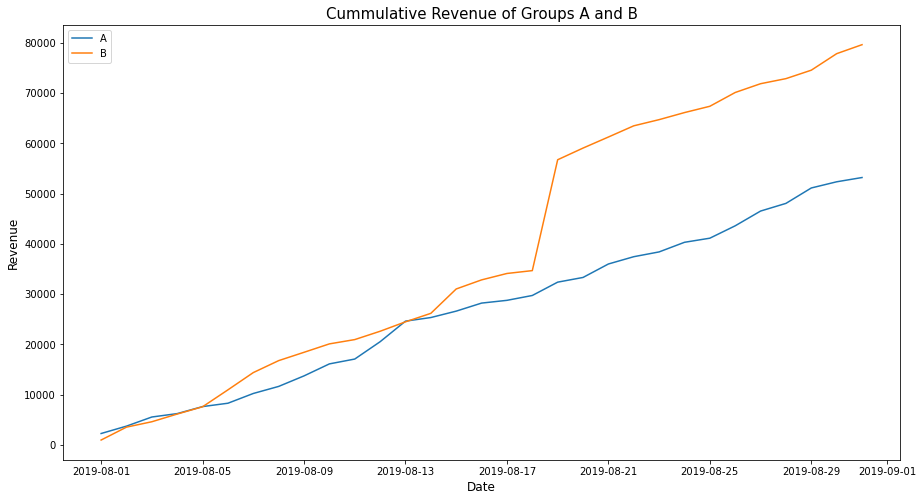

In [13]:
# Group new_order df by 'date' and 'group' and get the unique 'transactionId' and sum of their 'revenue'
CumData = (
    new_orders
    .pivot_table(index = 'date', columns = 'group', values = ['transactionId', 'revenue'],
    aggfunc = ({
        'transactionId': 'nunique',
        'revenue': 'sum'
    })).reset_index()
    )
CumData.columns = ('date', 'revenueA', 'revenueB', 'ordersA', 'ordersB')

# Calculating the cumulative revenue of each group
CumData['cum_revenueA'] = CumData['revenueA'].cumsum()
CumData['cum_revenueB'] = CumData['revenueB'].cumsum()

# Calculating the cumulative orders of each group
CumData['cum_ordersA'] = CumData['ordersA'].cumsum()
CumData['cum_ordersB'] = CumData['ordersB'].cumsum()

display(CumData.head())

# Graphical Representation of the cumulative revenue of each group
plt.figure(figsize=(15, 8))
plt.plot(CumData['date'], CumData['cum_revenueA'], label='A')
plt.plot(CumData['date'], CumData['cum_revenueB'], label='B')
plt.title('Cummulative Revenue of Groups A and B', size='15')
plt.xlabel('Date', size='12')
plt.ylabel('Revenue', size='12')
plt.legend()
plt.show()

<b>Conclusion</b>

In the above graph, Group A started off with a higher revenue than Group B till the 5th day of our test. Afterwards, with every increase from Group A, the cummulative average reveune of Group B topped the chart consistently with a good margin although the revenue of both groups became almost equal on the 13th day. Then Group B went back up.

There is a huge increase in the cummulative revenue of Group B on the 19th day. This increase is caused by the revenue (19920.4) from a visitor from Group B. This is one of many outliers to be dealt with going further so we can have a better analysis.

<a id='cum_ave_order'></a>
<b>Cumulative Average Order Size by Group.</b>

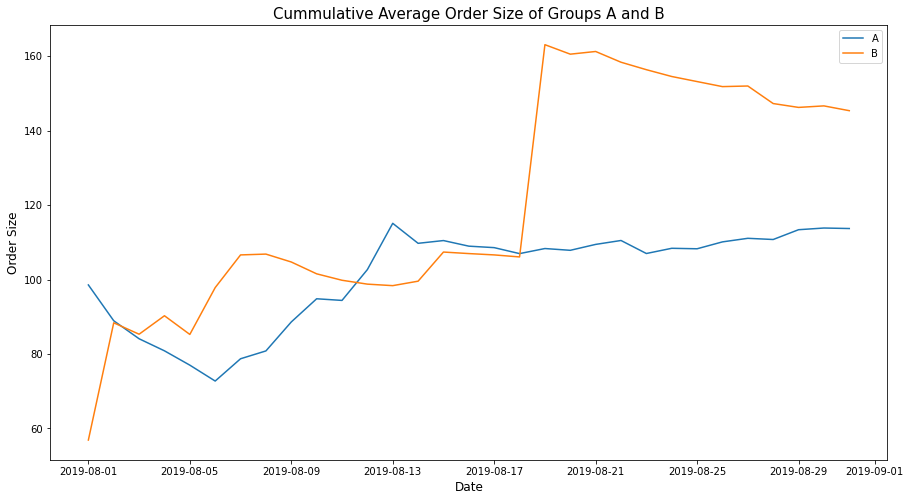

In [14]:
# Graphical Representation of cumulative average order size by group
plt.figure(figsize=(15, 8))
plt.plot(CumData['date'], CumData['cum_revenueA'] / CumData['cum_ordersA'], label='A')
plt.plot(CumData['date'], CumData['cum_revenueB'] / CumData['cum_ordersB'], label='B')
plt.title('Cummulative Average Order Size of Groups A and B', size='15')
plt.xlabel('Date', size='12')
plt.ylabel('Order Size', size='12')
plt.legend()
plt.show()

<b>Conclusion</b> 

Here, we calculated the cumulative average order size by group. The above graph seems to have almost the same pattern as that of cumulative revenue by group. 

While Group A started off higher than Group B, it dropped after the first day while Group B increased. Between the 12th and 18th day, Group A became higher than Group B again before Group B had a massive inclination. 

With this graph, seeing that there are possible outliers, it is a little had to make concrete deductions about which group is better.

<a id='rel_cum_averageorder'></a>
<b>Relative Difference in Cumulative Average Order Size of Group B compared with Group A.</b>

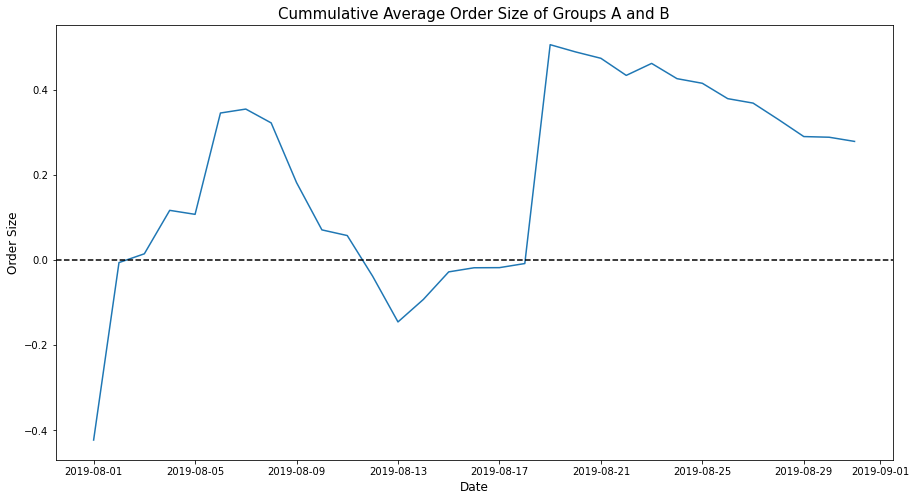

In [15]:
# Graphical Representation of the relative difference in cumulative average order size for groupB compared with groupA
plt.figure(figsize=(15, 8))
plt.plot(CumData['date'], (CumData['cum_revenueB']/CumData['cum_ordersB'])\
         / (CumData['cum_revenueA']/CumData['cum_ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Cummulative Average Order Size of Groups A and B', size='15')
plt.xlabel('Date', size='12')
plt.ylabel('Order Size', size='12')
plt.show()

<b>Conclusion</b>

Here, also, at several points there are spikes and peaks. Which shows that there are outliers. 

<a id='group_conversionrate'></a>
<b>Convertion Rate by Group</b>

We calculate each group's conversion rate as the ratio of orders to the number of visits for each day.

,date,visitsA,visitsB,cum_visitsA,cum_visitsB,cum_ordersA,cum_ordersB,conversionA,conversionB
0,2019-08-01,719,713,719,713,23,17,0.0320,0.0238
1,2019-08-02,619,581,1338,1294,42,40,0.0314,0.0309
2,2019-08-03,507,509,1845,1803,66,54,0.0358,0.0300
3,2019-08-04,717,770,2562,2573,77,68,0.0301,0.0264
4,2019-08-05,756,707,3318,3280,99,89,0.0298,0.0271


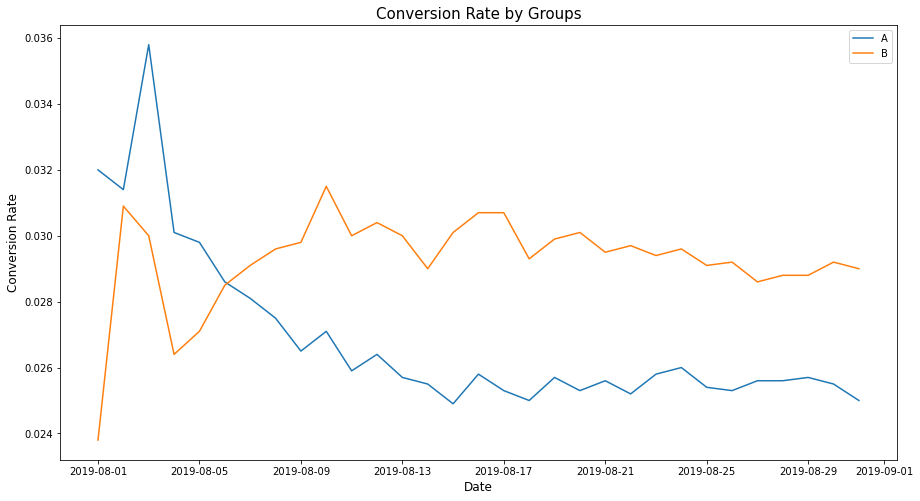

In [16]:
# Group the visits df by 'date' and 'group' and sum the 'visits'
visits_grouped_ = visits.pivot_table(index='date', columns='group', values='visits', aggfunc=(sum)).reset_index()
visits_grouped_.columns = ('date', 'visitsA', 'visitsB')

# Create cumulative visits for each group
visits_grouped_['cum_visitsA'] = visits_grouped_['visitsA'].cumsum()
visits_grouped_['cum_visitsB'] = visits_grouped_['visitsB'].cumsum()

# Merge the groups 'date', 'cum_ordersA', and'cum_ordersB' columns of CumData to visits_grouped_
visits_grouped = visits_grouped_.merge(CumData[['date', 'cum_ordersA', 'cum_ordersB']], how='outer', on='date')
visits_grouped['conversionA'] = (visits_grouped['cum_ordersA'] / visits_grouped['cum_visitsA']).round(4)
visits_grouped['conversionB'] = (visits_grouped['cum_ordersB'] / visits_grouped['cum_visitsB']).round(4)
display(visits_grouped.head())

# Graphical Representation of conversion rate by group
plt.figure(figsize=(15, 8))
plt.plot(visits_grouped['date'], visits_grouped['conversionA'], label='A')
plt.plot(visits_grouped['date'], visits_grouped['conversionB'], label='B')
plt.title('Conversion Rate by Groups', size='15')
plt.xlabel('Date', size='12')
plt.ylabel('Conversion Rate', size='12')
plt.legend()
plt.show()

<b>Conclusion</b>

From the above chart, Group A has a peeking problem in conversion in the first few days of our test while Group B significantly fluctuated. Then on the fourth and fifth day, Group B began to rise while Group A declined. After the ninth day, Group A's declination started to swing between 0.024 and 0.026 while the inclination of Group B swung between 0.029 and 0.031.

This is to say that Group B had more conversion along the way than Group A.

<a id='relative_difference_conversion'></a>
<b>Relative Difference in Conversion of Group B in comparison to Group A</b>

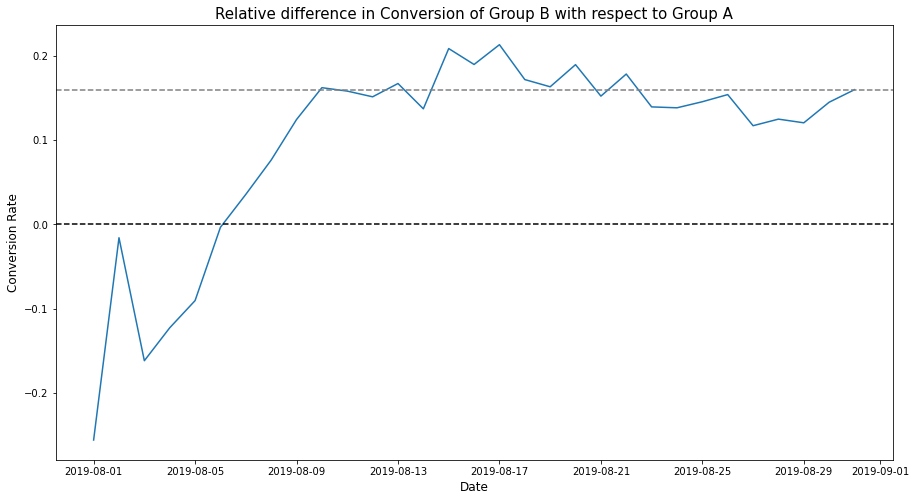

In [17]:
# This is the relative difference in conversion of Group B in comparison to Group A
plt.figure(figsize=(15, 8))
plt.plot(visits_grouped['date'], visits_grouped['conversionB'] / visits_grouped['conversionA'] - 1, label='A')
plt.title('Relative difference in Conversion of Group B with respect to Group A', size='15')
plt.xlabel('Date', size='12')
plt.ylabel('Conversion Rate', size='12')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.16, color='grey', linestyle='--')
plt.show()

<b>Conclusion</b>

The graph shows the relative difference in conversion of Group B to Group A. From the graph, we see that although there was a rise and fall in the conversion before between the first day and 5th day of the test before an inclination, the conversion of Group B has the tendency to grow and stabilize around the mean while Group A has no such tendency.

The results of Group B are better than that of Group A in term of conversion.

<a id='scatter_plot'></a>
<b>Scatter Plot of the Number of Orders per User.</b>

,visitorId,num_of_orders,revenue
0,11685486,1,100.4
1,54447517,1,5.0
2,66685450,1,125.9
3,78758296,1,20.1
4,85103373,1,20.8


,visitorId,num_of_orders,revenue
0,5114589,1,10.8
1,6958315,1,25.9
2,39475350,1,65.4
3,47206413,1,15.2
4,48147722,1,20.8


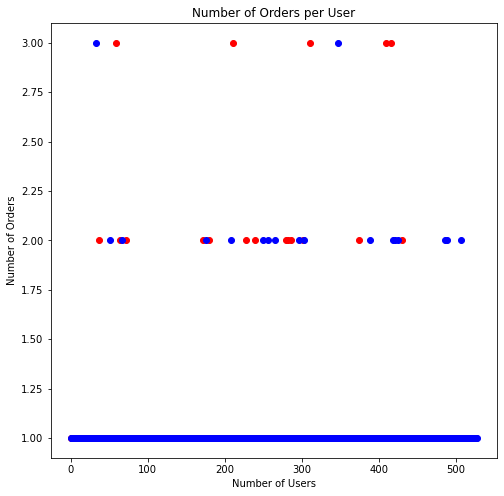

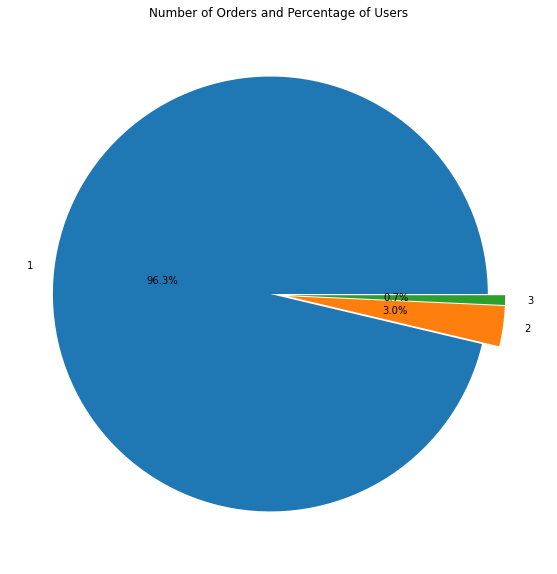

In [18]:
OrdersPerUserA = new_orders.query('group == "A"').groupby('visitorId').agg({'revenue': ['count', 'sum']}).reset_index()
OrdersPerUserA.columns = ('visitorId', 'num_of_orders', 'revenue')

OrdersPerUserB = new_orders.query('group == "B"').groupby('visitorId').agg({'revenue': ['count', 'sum']}).reset_index()
OrdersPerUserB.columns = ('visitorId', 'num_of_orders', 'revenue')

display(OrdersPerUserA.head())
display(OrdersPerUserB.head())

# Scatter plot to show the number of orders per buyer
plt.figure(figsize=(8,8))
plt.scatter(pd.Series(range(0, len(OrdersPerUserA['num_of_orders']))), OrdersPerUserA['num_of_orders'], c='red')
plt.scatter(pd.Series(range(0, len(OrdersPerUserB['num_of_orders']))), OrdersPerUserB['num_of_orders'], c='blue')
plt.title('Number of Orders per User')
plt.xlabel('Number of Users')
plt.ylabel('Number of Orders')
plt.show()

# General grouping
OrdersPerUser = new_orders.groupby('visitorId').agg({'revenue': ['count', 'sum']}).reset_index()
OrdersPerUser.columns = ('visitorId', 'num_of_orders', 'revenue')


#OrdersPerUser[['']](autopct="%.1f%%")
plt.figure(figsize=(10,10))
labels = OrdersPerUser.groupby('num_of_orders')['visitorId'].count().keys()
plt.pie(x=(OrdersPerUser.groupby('num_of_orders')['visitorId'].count()), autopct="%.1f%%", explode=[0.04]*3,\
        labels=labels, pctdistance=0.5)
plt.title('Number of Orders and Percentage of Users')
plt.show()

<a id='precentiles_orders'></a>
<b>Percentiles of Number of Orders per User</b>

Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.

In [19]:
np.percentile(OrdersPerUser['num_of_orders'], [95, 99])

array([1., 2.])

<b>Conclusion</b>

From the percentile calculation, not more than 5% of the visitors made more than 1 order and not more than 1% of the visitors made more than 2 orders. Here, we conclude that the 1% with 2 or more orders are the outliers.

<a id='percentile_revenue'></a>
<b>Percentiles of Order Prices</b>

Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly. 

In [20]:
np.percentile(OrdersPerUser['revenue'], [95, 99])

array([449.5  , 912.576])

<b>Conclusion</b>

From the above calculation, we can see that not more than 5% of the visitors brought in 449.5 as revenue and not more than 1% brought in 912.576. Here, we will identify our anomalies as those visitors that brought in 449.5 and above i.e 1% to 5% of the users.

<a id='scatter_plot_prices'></a>
<b>Scatter Plot of Order Prices</b>

Plot a scatter chart of order prices of filtered and unfiltered data. Make conclusions and conjectures.

In [21]:
# Get users with orders more than or equal to 2 in both groups
UsersWithManyOrders = OrdersPerUser[OrdersPerUser['num_of_orders'] >= 2]['visitorId']

# Get users with orders whose revenue is more than or equal to 449.5
UsersWithCostlyOrders = new_orders[new_orders['revenue'] >= 449.5]['visitorId']

# Concatenate visitorId of those users
AbnormalUsers = pd.concat([UsersWithManyOrders, UsersWithCostlyOrders], axis=0).drop_duplicates()

Filtered_OrdersPerUser = OrdersPerUser[~(OrdersPerUser['visitorId'].isin(AbnormalUsers))]

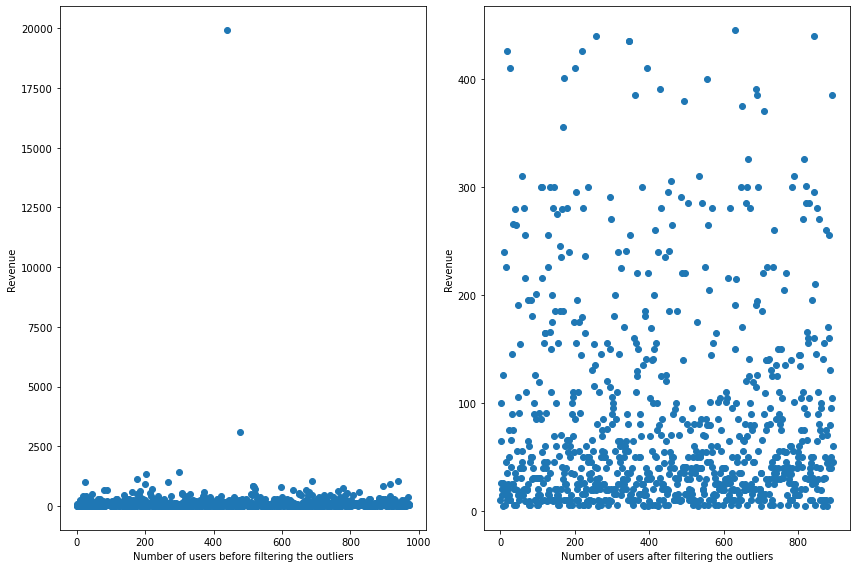

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
# ax.set_title('Order Prices')
ax[0].scatter(x = pd.Series(range(0, len(OrdersPerUser['num_of_orders']))), y = OrdersPerUser['revenue'])
ax[0].set_xlabel("Number of users before filtering the outliers")
ax[0].set_ylabel("Revenue")

ax[1].scatter(x = pd.Series(range(0, len(Filtered_OrdersPerUser['num_of_orders']))), y = Filtered_OrdersPerUser['revenue'])
ax[1].set_xlabel("Number of users after filtering the outliers")
ax[1].set_ylabel("Revenue")
fig.tight_layout()
plt.show()

<b>Conclusion</b>

Here, we can deduce that almost all the visitors brought in revenue not more than 2500. We can also see the visitors' revenue spread (the volume of visitors and the corresponding revenue). This also shows a few of the revenue that are above 2500. 

<a id='stat_significance'></a>
### Statistical Significance Calculations

<a id='stat_conversion_raw'></a>
#### Statistical significance of the difference in conversion between the groups using the raw data.</b>

In [23]:
# Group each group of new_orders by visitorId column and aggregate the transactionID. These new groups are for
# visitors with at least one order.
Raw_new_ordersA = (
            new_orders[new_orders['group'] == 'A']
            .groupby('visitorId', as_index=False)
            .agg({'transactionId': pd.Series.nunique})
            )
Raw_new_ordersA.columns = ('visitorId', 'num_of_orders')

Raw_new_ordersB = (
            new_orders[new_orders['group'] == 'B']
            .groupby('visitorId', as_index=False)
            .agg({'transactionId': pd.Series.nunique})
            )
Raw_new_ordersB.columns = ('visitorId', 'num_of_orders')

# Find the number of visitors with 0 order in each group, apply np.arange to it, and convert it to a pd series
ZeroOrdersA_series = (
                pd
                .Series(
                0, np.arange(visits[visits['group'] == 'A']['visits'].sum() - len(Raw_new_ordersA['num_of_orders'])))
                )

ZeroOrdersB_series = (
                pd
                .Series(
                0, np.arange(visits[visits['group'] == 'B']['visits'].sum() - len(Raw_new_ordersB['num_of_orders'])))
                )

# Concatenate the column containing the number of orders in each group and the Series containing the zero orders
RawSampleA = pd.concat([ZeroOrdersA_series, Raw_new_ordersA['num_of_orders']], axis=0)

RawSampleB = pd.concat([ZeroOrdersB_series, Raw_new_ordersB['num_of_orders']], axis=0)


**Null Hypothesis:** There is no statistical significant difference in conversion between Group A and Group B.

**Alternative Hypothesis:** There is a statistical significant difference in conversion between Group A and Group B

In [24]:
# This is the p-value showing whether or not to reject the hypothesis that there exist any statistical difference 
# between the groups
alpha = 0.05
RawData_pvalue = stats.mannwhitneyu(RawSampleA, RawSampleB, alternative='two-sided')[1].round(3)
print('P-value: {}'.format(RawData_pvalue))
if (RawData_pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")
    
# This is the relative conversion gain(if value is positive) or loss(if value is negative) for group B compared to 
# group A
display("{0:.2f}".format(RawSampleB.mean()/RawSampleA.mean()-1))

P-value: 0.011
We reject the null hypothesis


'0.16'

<b>Conclusion</b>

From the above hypothesis, our p-value(0.011) is less than our alpha(0.05) which leads to rejecting the null hypothesis that the statistical significance in conversion between Group A and Group B are equal. This implies that there is a difference in the statistical significance in conversion between Group A and Group B.

Now, calculating the relative difference conversion for Group B in comparison to Group A, we have the result 0.16. Rejecting our null hypothesis also means that this relative difference of 16% did not happen by chance and that the difference, statistically, exists.

<a id='stat_revenue_raw'></a>
#### Statistical significance of the difference in average order size between the groups using the raw data.

**Null Hypothesis:** There is no statistical significant difference in average order size between Group A and Group B in the raw data.

**Alternative Hypothesis:** There is a statistical significant difference in average order size between Group A and Group B in the raw data.

In [25]:
alpha = 0.05
P_value = stats.mannwhitneyu(new_orders[new_orders['group']=='A']['revenue'],\
                             new_orders[new_orders['group']=='B']['revenue'], alternative='two-sided')[1]
print('P_value: {0:.2f}'.format(P_value))
if (P_value < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

Raw_revenueA = new_orders[new_orders['group']=='A']['revenue']
Raw_revenueB = new_orders[new_orders['group']=='B']['revenue']

print('{0:.2f}'.format(Raw_revenueB.mean()/Raw_revenueA.mean() - 1))

P_value: 0.86
We can't reject the null hypothesis
0.28


<b>Conclusion</b>

From the above test, our p_value(0.86) is greater than alpha meaning we can't reject the null hypothesis. There is no statistical significance difference in revenue between Group A and Group B. In other words, there is a 86% chance that the statistical significance of the average order size between Group A and Group B in the raw data are equal.

<a id='stat_conversion_filtered'></a>
#### Statistical significance of the difference in conversion between the groups using the filtered data.

Find the statistical significance of the difference in conversion between the groups using the filtered data.

We defined our anomalies as users with 2 or more orders and users with more than order size of 449.5.

In [26]:
# Filter out the anomaly visitors from the raw data
Filtered_new_ordersA = Raw_new_ordersA[~(Raw_new_ordersA['visitorId'].isin(AbnormalUsers))]

Filtered_new_ordersB = Raw_new_ordersB[~(Raw_new_ordersB['visitorId'].isin(AbnormalUsers))]

# Concatenate the Series of zero order visitors with the "num_of_orders" column in the filtered orders
FilteredSampleA = pd.concat([ZeroOrdersA_series, Filtered_new_ordersA['num_of_orders']], axis=0)

FilteredSampleB = pd.concat([ZeroOrdersB_series, Filtered_new_ordersB['num_of_orders']], axis=0)


**Null Hypothesis:** There is no statistical significant difference in conversion between Group A and Group B for the filtered data

**Alternative Hypothesis:** There is a statistical significant difference in conversion between Group A and Group B for the filtered data

In [27]:
alpha = 0.05

PValue = stats.mannwhitneyu(FilteredSampleA, FilteredSampleB, alternative='two-sided')[1].round(3)
print('p-value: {}'.format(PValue))

if PValue < alpha:
    print('We reject the null hypothesis.')
else:
    print("We can't reject the null hypothesis")

# Calculate the relative gain in conversion of Group B in comparison with Group A
print('{0:.2f}'.format(FilteredSampleB.mean()/FilteredSampleA.mean() - 1))

p-value: 0.012
We reject the null hypothesis.
0.18


<b>Conclusion</b>

We tested the hypothesis that there is no statistical significant difference in conversion between Group A and Group B in the filtered data. The p-value (0.012) of our hypothesis, which is less than 0.05, shows we have to reject the null hypothesis. In other words, there is a statistical significant difference in conversion between Group A and Group B in the filtered data and there's only a 1.2% probability that they will be equal.

<a id='stat_revenue_filtered'></a>
#### Statistical significance of the difference in average order size between the groups using the filtered data.

**Null Hypothesis:** There is no statistical significant difference in average order size between Group A and Group B in the filtered data.

**Alternative Hypothesis:** There is a statistical significant difference in average order size between Group A and Group B in the filtered data.

In [28]:
alpha = 0.05
Filtered_order = new_orders[~new_orders['visitorId'].isin(AbnormalUsers)]
P_Value = (
    stats
    .mannwhitneyu(Filtered_order[Filtered_order['group'] == 'A']['revenue'], \
                  Filtered_order[Filtered_order['group'] == 'B']['revenue'], alternative='two-sided')[1]
    .round(2)
    )
print('p-value: {}'.format(P_Value))
if P_Value < alpha:
    print('We reject the null hypothesis.')
else:
    print("We can't reject the null hypothesis.")

# Calculating the relative difference in average order size of Group B in comparison to Group A in the filtered data
Filtered_revenueA = Filtered_order[Filtered_order['group'] == 'A']['revenue']
Filtered_revenueB = Filtered_order[Filtered_order['group'] == 'B']['revenue']

print(Filtered_revenueB.mean()/Filtered_revenueA.mean() - 1)

p-value: 0.88
We can't reject the null hypothesis.
-0.009366653814532833


<b>Conclusion</b>

In this hypothesis, with our p-value resulting to 0.88, we can't reject the null hypothesis. This means that there is a 88% chance that the statistical significance of the average order size of Group A and Group B in the filtered data are equal.

<a id='decision'></a>
#### Result-Based Decision

Conclusively, here are results of our hypothesis:

* There is a statistical significant in difference in the conversion between Group A and Group B both in the raw and filtered data. Filtering out the outliers changed the relative conversion gain from 16% to 18%.
* There is no statistical significant difference in average order size between Group A and Group B both in the raw and filtered data. So the relative difference of 28% (for raw data) and -0.9% (for the filtered data) in the average order size of Group B in comparison to Group A of the raw data is statistically insignificant. It happened by chance.

So, based on our test results, we stop the test and consider Group B the leader.

### Conclusion


First of all, we preprocessed our datasets. The orders and visits files have their data columns in the wrong datatype. We converted them to the datetime datatype.

* **Prioritizing hypotheses**
    
    In hypotheses prioritization, two methods are considered. ICE and RICE. These methods affects the order of priority of a hypothesis in different ways. Take an instance, according to ICE result, hypothesis 8 is with the highest priority but according to RICE calculation, it is at the 5th priority. This is because of its high impact, hight confidence, medium effort but a really low reach. Same goes to hypothesis 0. It ranks second in ICE calculation but 3rd in RICE calcultion. It has a high impact, hight confidence, medium effort but a low reach.
    Having a low effort in both framework calculation goes a long way in increasing the priority of a hypothesis. But if a hypothesis has a low effort while other factors are low too, the chances of having a high priority will be low. Take an instance, hypothesis 4. Although it has a low effort, all other factors affecting the calculation of both frameworks are low and this resulted to it being the least in the decreasing order of priority for both frameworks.

    So, for a hypothesis to have a high rank in RICE or/and ICE, the reach, impact, and confidence have to be high while the effort has to be low.

* **The cumulative revenue and cumulative average order size by groups**
    
    For the cumulative revenue, Group A started off better than Group B till fifth day and the Group B increased. There is a huge increase in the cummulative revenue of Group B on the 19th day. This increase is caused by the revenue (19920.4) from a visitor from Group B. That is obviously an outlier. So, we cannot make conclusions at this point.
    
    For the cumulative average order size, there are also possible outliers in the cumulative average order. Group A started off higher than Group B, it dropped after the first day while Group B increased. Between the 12th and 18th day, Group A became higher than Group B again before Group B had a massive inclination.

* **Convertion Rate by Groups**
    
    While both groups had peeking problems in conversion at the first 3 to 4 days, Group B significantly fluctuated. Then on the fourth and fifth day, Group B began to rise again while Group A declined. After the ninth day, Group A's declination started to swing between 0.024 and 0.026 while the inclination of Group B swung between 0.029 and 0.031.

    This is to say that Group B had more conversion along the way than Group A.
    
* **The relative difference in conversion and cumulative average order size of one group over the other**
   
   We plotted a graph of the relative difference in conversion of Group B to Group A. From the graph, we see that although there was a rise and fall in the conversion before between the first day and 5th day of the test before an inclination, the conversion of Group B has the tendency to grow and stabilize around the mean while Group A has no such tendency. The results of Group B are better than that of Group A in term of conversion.
   
   We also plotted a graph of the relative difference in cumulative average order size of Group B to Group A. Here, at several points there are spikes and peaks. Which shows that there are outliers.
   

* **The statistical significance of the difference in conversion and average order size between the groups using the unfiltered data compared with the filtered data**

    First, we filtered the data of users with 2 or more orders and users with more than order size of 449.5. 
    
    From the results of our hypotheses,
    
    * There is a statistical significant in difference in the conversion between Group A and Group B both in the raw and filtered data. Filtering out the outliers changed the relative conversion gain from 16% to 18%.
    * There is no statistical significant difference in average order size between Group A and Group B both in the raw and filtered data. So the relative difference of 28% (for raw data) and -0.9% (for the filtered data) in the average order size of Group B in comparison to Group A of the raw data is statistically insignificant. It happened by chance.

#### Recommendation

Based on the results of our hypotheses, tests, and calculation, we stop the test and consider Group B the leader.